## Data Cleaning

In [1]:
import pandas as pd

In [2]:
huge_df = pd.read_csv('./tutorial/raw.csv', sep = ',')

In [3]:
huge_df.shape

(7747, 11)

In [4]:
huge_df.columns

Index(['author', 'author3', 'author4', 'profile_url', 'title', 'profile_picks',
       'content1', 'content2', 'content3', 'content4', 'url'],
      dtype='object')

In [5]:
huge_df.head()

,author,author3,author4,profile_url,title,profile_picks,content1,content2,content3,content4,url
0,"<p class=""metadata__byline""><span class=""metad...",NaN,NaN,https://www.cnn.com/profiles/marianne-garvey,"<h1 class=""pg-headline"">Ben Affleck is gratefu...",NaN,"Promoting his new movie ""The Tender Bar,"" th...",NaN,NaN,NaN,https://www.cnn.com/2021/12/01/entertainment/b...
1,NaN,"<p data-type=""byline-area"">By Tierney Sneed, M...",NaN,NaN,NaN,NaN,NaN,NaN,"<p class=""sc-gZMcBi render-stellar-contentstyl...",NaN,https://www.cnn.com/politics/live-news/supreme...
2,NaN,"<p data-type=""byline-area"">By Adam Renton, <a ...",NaN,NaN,NaN,NaN,NaN,NaN,"<p class=""sc-gZMcBi render-stellar-contentstyl...",NaN,https://www.cnn.com/world/live-news/omicron-co...
3,"<p class=""metadata__byline""><span class=""metad...",NaN,NaN,"https://www.cnn.com/profiles/amir-vera,https:/...","<h1 class=""pg-headline"">Students grabbed sciss...",https://www.cnn.com/videos/us/2021/12/02/stude...,"Then frightened students barricaded doors, pho...",NaN,NaN,NaN,https://www.cnn.com/2021/12/01/us/michigan-oxf...
4,"<p class=""metadata__byline""><span class=""metad...",NaN,NaN,"https://www.cnn.com/profiles/kaitlan-collins,h...","<h1 class=""pg-headline"">First confirmed US cas...",https://www.cnn.com/videos/health/2021/12/01/o...,"In a White House news briefing, Dr. Anthony Fa...",NaN,NaN,NaN,https://www.cnn.com/2021/12/01/health/us-omicr...


In [6]:
huge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7747 entries, 0 to 7746
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   author         4608 non-null   object 
 1   author3        106 non-null    object 
 2   author4        1816 non-null   object 
 3   profile_url    4369 non-null   object 
 4   title          4615 non-null   object 
 5   profile_picks  2815 non-null   object 
 6   content1       4609 non-null   object 
 7   content2       0 non-null      float64
 8   content3       105 non-null    object 
 9   content4       1815 non-null   object 
 10  url            7747 non-null   object 
dtypes: float64(1), object(10)
memory usage: 665.9+ KB


From this info, we can see that we obtained nearly 6000 article's author and content information. We will be working to condense these together now

In [7]:
huge_df['content4'].dropna()

259     \n      An archaeologist who detects civilizat...
260     \n      In the azure waters off the rocky coas...
264     \n      As Turkey returns to some degree of no...
265     \n      President ,Donald Trump,’s bid to keep...
268     \n      The couple gazes brightly at the camer...
                              ...                        
7639    \n      Marilou Danley said that she was worri...
7643    \n      NOAA helped Key West residents check o...
7744    \n      Hurricane Irma regained Category 5 sta...
7745    \n      ,Editor’s note: This is a developing s...
7746    \n      Time is running out to evacuate and pr...
Name: content4, Length: 1815, dtype: object

In [8]:
huge_df.loc[huge_df['content4'].dropna().index,:].isna().sum()

author           1815
author3          1815
author4             5
profile_url      1815
title            1815
profile_picks    1809
content1         1815
content2         1815
content3         1815
content4            0
url                 0
dtype: int64

In [9]:
huge_df['content4'].dropna().shape

(1815,)

The commented code below was used to find urls for which we were missing author data and informed our creation of other author and content columns.

In [10]:
#huge_df[huge_df['author'].isna()]['url']

In [11]:
#[value for value  in huge_df[(huge_df['content1'].isna()) & (huge_df['content3'].isna()) & (huge_df['content4'].isna())]['url'].values]

In [12]:
#[value for value  in huge_df[huge_df['author'].isna()]['url'].values]

In [13]:
url_set=set(huge_df.url.values)

In [14]:
profile_set=set(huge_df.profile_url.values)

In [15]:
import numpy as np

In [16]:
profile_list = list(huge_df.profile_url.values)

In [17]:
profile_list[2]

nan

In [18]:
huge_df.profile_url[2]

nan

In [19]:
url_set.intersection(profile_set)

{'https://www.cnn.com/profiles/arwa-damon',
 'https://www.cnn.com/profiles/becky-anderson-profile',
 'https://www.cnn.com/profiles/ben-westcott',
 'https://www.cnn.com/profiles/brad-lendon',
 'https://www.cnn.com/profiles/catherine-shoichet-profile',
 'https://www.cnn.com/profiles/christina-zdanowicz-profile',
 'https://www.cnn.com/profiles/dan-merica-profile',
 'https://www.cnn.com/profiles/david-mckenzie',
 'https://www.cnn.com/profiles/donie-osullivan',
 'https://www.cnn.com/profiles/elizabeth-cohen',
 'https://www.cnn.com/profiles/helen-regan',
 'https://www.cnn.com/profiles/jason-carroll-profile',
 'https://www.cnn.com/profiles/joan-biskupic',
 'https://www.cnn.com/profiles/john-d-sutter',
 'https://www.cnn.com/profiles/julia-hollingsworth',
 'https://www.cnn.com/profiles/katia-hetter',
 'https://www.cnn.com/profiles/lisa-france',
 'https://www.cnn.com/profiles/maegan-vazquez',
 'https://www.cnn.com/profiles/nic-robertson',
 'https://www.cnn.com/profiles/nick-paton-walsh',
 'https

In [20]:
huge_df.profile_url.str.contains(',')

0       False
1         NaN
2         NaN
3        True
4        True
        ...  
7742      NaN
7743      NaN
7744      NaN
7745      NaN
7746      NaN
Name: profile_url, Length: 7747, dtype: object

Here we found that some of hte profile_urls contained comma separated values. We attempted to investigate this.

In [21]:
huge_problem=huge_df.profile_url.str.contains(',').dropna()

In [22]:
huge_df.profile_url.dropna()[huge_problem]

3       https://www.cnn.com/profiles/amir-vera,https:/...
4       https://www.cnn.com/profiles/kaitlan-collins,h...
31      https://www.cnn.com/profiles/ariane-de-vogue-p...
36      https://www.cnn.com/profiles/ariane-de-vogue-p...
37      https://www.cnn.com/profiles/ariane-de-vogue-p...
                              ...                        
7708    https://www.cnn.com/profiles/amir-vera,https:/...
7714    https://www.cnn.com/profiles/jacqueline-howard...
7726    https://www.cnn.com/profiles/jacqueline-howard...
7733    https://www.cnn.com/profiles/kaitlan-collins,h...
7739    https://www.cnn.com/profiles/kaitlan-collins,h...
Name: profile_url, Length: 1970, dtype: object

In [23]:
huge_df.url[3]

'https://www.cnn.com/2021/12/01/us/michigan-oxford-high-school-shooting-wednesday/index.html'

In [24]:
#profile_set

In [25]:
#huge_df.dropna()

In [26]:
#huge_df['content1'][1]

In [27]:
#huge_df.content1.nunique()

In [28]:
big_df = huge_df.drop(columns='profile_url')

In [29]:
big_df.dropna(inplace=True)

---

### Extracting Authors ###

In [30]:
from bs4 import BeautifulSoup
import bs4

In [31]:
def get_text(soup):
    """Used to get text from BeutifulSoup objects in a dataframe in conjunction with the .apply() method"""
    return soup.text

In [32]:
def reduce(ls):
    """This is a simple function to get rid of extra elements obtained by the .split() method"""
    if(ls[-1]==''):
        return ls[:-1]
    return ls

In [33]:
huge_df.columns #remind ourselves of the column names. author2 and content5 both gave poor results

Index(['author', 'author3', 'author4', 'profile_url', 'title', 'profile_picks',
       'content1', 'content2', 'content3', 'content4', 'url'],
      dtype='object')

The function below extracts a list of authors from the html in the authors column.

In [34]:
def extract_authors(data_frame, author_string):
    df = data_frame[author_string].dropna().apply(BeautifulSoup).apply(get_text)
    for word in unnecessary_words: #see blocks below
        df=df.str.replace(word, '')
    df = df.str.replace(' and ',', ')
    return df.str.replace(' ','').str.split(',').apply(reduce) # put after reduce

As an example, we extract from the `author` column

We found that the following words in the author's column aren't authors.

In [35]:
unnecessary_words=['EXCLUSIVE', 'CNN', 'Business', 'Photos', 'by', 'By', 'Photographs', 'Video','Story:', 'Story', 'Analysis', 'Illustrations:', 'Illustrations','Illustration', 'Graphics', 'Reuters', 'InvestigatesAdditional', 'reporting', 'Opinion', 'video', ' for ', 'photographs','photos', 'graphics', 'meteorologists', 'en Espa\xf1ol', 'edited', '\'s',';','.', ' with ', 'With', 'Text', 'Staff', 'White House Producer', 'Photo Editing', 'Medical', 'Chief', 'Investigates', 'Meteorologist', 'Reporter', 'Photo', 'Religion Editor', 'Religion Editor Edited', 'Article', 'Graphic', 'REPORTING', 'photoediting', 'Digital', ]

unnecessary_words.append('Pentagon Correspondent')
unnecessary_words.append('Chief Medical Correspondent')
unnecessary_words.append('National Affairs Correspondent')
unnecessary_words.append('Senior Medical Correspondent')
unnecessary_words.append('legal analyst & Supreme Court biographer')
unnecessary_words.append('Supreme Court Reporter')
unnecessary_words.append('Crime and Justice')
unnecessary_words.append('Data analysis')
unnecessary_words.append('International Climate Editor')


In [36]:
extract_authors(huge_df, 'author')

C:\Users\chris\miniconda3\lib\site-packages\pandas\core\apply.py:1099: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 1099 of the file C:\Users\chris\miniconda3\lib\site-packages\pandas\core\apply.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  mapped = lib.map_infer(
C:\Users\chris\AppData\Local\Temp/ipykernel_22780/2475761144.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df=df.str.replace(word, '')


0                                        [MarianneGarvey]
3       [JasonHanna, AmirVera, AdrienneBroaddus, Shimo...
4          [KaitlanCollins, JacquelineHoward, BetsyKlein]
5                                        [MarianneGarvey]
6                           [ArianedeVogue, SupremeCourt]
                              ...                        
7732                                   [JacquelineHoward]
7733                      [KaitlanCollins, MaeganVazquez]
7739                      [KaitlanCollins, MaeganVazquez]
7740                                     [KaitlanCollins]
7741                                     [KaitlanCollins]
Name: author, Length: 4608, dtype: object

The function below does the same, except for authors columns which were scraped as strings without any html.

In [37]:
def authors_from_string(data_frame, author_string):
    df = data_frame[author_string].dropna()
    df = df.str.replace(' and ',', ')
    for word in unnecessary_words: #see blocks below
        df=df.str.replace(word, '')
    df = df.str.replace('Written', '')
    return df.str.replace(' ', '').str.strip().str.split(',').apply(reduce)

As an example we can now extract the authors from the `author4` column

In [38]:
authors_from_string(huge_df, 'author4')

C:\Users\chris\AppData\Local\Temp/ipykernel_22780/111151725.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df=df.str.replace(word, '')


259                                [LaurenSaid-Moorhouse]
260                                [LaurenSaid-Moorhouse]
264                                [LaurenSaid-Moorhouse]
265                                [LaurenSaid-Moorhouse]
268                                [LaurenSaid-Moorhouse]
                              ...                        
7643                                        [PaulPMurphy]
7644    [MegWagner, VeronicaRocha, AmandaWills, Emanue...
7744                            [JasonHanna, SteveAlmasy]
7745                 [HollyYan, DarranSimon, FaithKarimi]
7746                          [MadisonPark, EricLevenson]
Name: author4, Length: 1816, dtype: object

---

## Brining it all together ##

In [39]:
series1 = extract_authors(huge_df, 'author')
series2 = extract_authors(huge_df, 'author3')
series3 = authors_from_string(huge_df, 'author4')

C:\Users\chris\AppData\Local\Temp/ipykernel_22780/2475761144.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df=df.str.replace(word, '')
C:\Users\chris\AppData\Local\Temp/ipykernel_22780/111151725.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df=df.str.replace(word, '')


In [40]:
authors = pd.concat([series1,series2,series3])

In [41]:
content = pd.concat([huge_df['content1'].dropna(),huge_df['content2'].dropna(),huge_df['content3'].dropna(),huge_df['content4'].dropna()])

In [42]:
data=pd.merge(how = 'inner', left=content.rename('content'), right=authors.rename('authors'), left_index=True, right_index=True)

In [43]:
data['url']=huge_df.loc[data.index, 'url']

In [44]:
final_df = data.reset_index().drop(columns='index')

In [45]:
final_df=pd.merge(how='left', left = final_df, right = huge_df['title'].rename('title'), left_index=True, right_index=True)

In [46]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6520 entries, 0 to 6519
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  6520 non-null   object
 1   authors  6520 non-null   object
 2   url      6520 non-null   object
 3   title    3901 non-null   object
dtypes: object(4)
memory usage: 203.9+ KB


In [47]:
final_df

,content,authors,url,title
0,"Promoting his new movie ""The Tender Bar,"" th...",[MarianneGarvey],https://www.cnn.com/2021/12/01/entertainment/b...,"<h1 class=""pg-headline"">Ben Affleck is gratefu..."
1,"Then frightened students barricaded doors, pho...","[JasonHanna, AmirVera, AdrienneBroaddus, Shimo...",https://www.cnn.com/2021/12/01/us/michigan-oxf...,NaN
2,"In a White House news briefing, Dr. Anthony Fa...","[KaitlanCollins, JacquelineHoward, BetsyKlein]",https://www.cnn.com/2021/12/01/health/us-omicr...,NaN
3,"On Tuesday, he had teased the song on Instagra...",[MarianneGarvey],https://www.cnn.com/2021/12/02/entertainment/s...,"<h1 class=""pg-headline"">Students grabbed sciss..."
4,The dispute represents the culmination of a de...,"[ArianedeVogue, SupremeCourt]",https://www.cnn.com/2021/12/01/politics/suprem...,"<h1 class=""pg-headline"">First confirmed US cas..."
...,...,...,...,...
6515,\n Marilou Danley said that she was worri...,"[MadisonPark, DarranSimon, HollyYan, EricLeven...",https://www.cnn.com/2017/10/04/us/las-vegas-sh...,NaN
6516,\n NOAA helped Key West residents check o...,[PaulPMurphy],https://www.cnn.com/2017/09/12/us/noaa-satelli...,NaN
6517,\n Hurricane Irma regained Category 5 sta...,"[JasonHanna, SteveAlmasy]",https://www.cnn.com/2017/09/08/us/hurricane-ir...,NaN
6518,"\n ,Editor’s note: This is a developing s...","[HollyYan, DarranSimon, FaithKarimi]",https://www.cnn.com/2017/09/11/us/hurricane-ir...,NaN


In [48]:
import matplotlib.pyplot as plt

In [49]:
dummies=pd.get_dummies(final_df['authors'].apply(pd.Series).stack()).sum(level=0)

C:\Users\chris\AppData\Local\Temp/ipykernel_22780/1367079681.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies=pd.get_dummies(final_df['authors'].apply(pd.Series).stack()).sum(level=0)


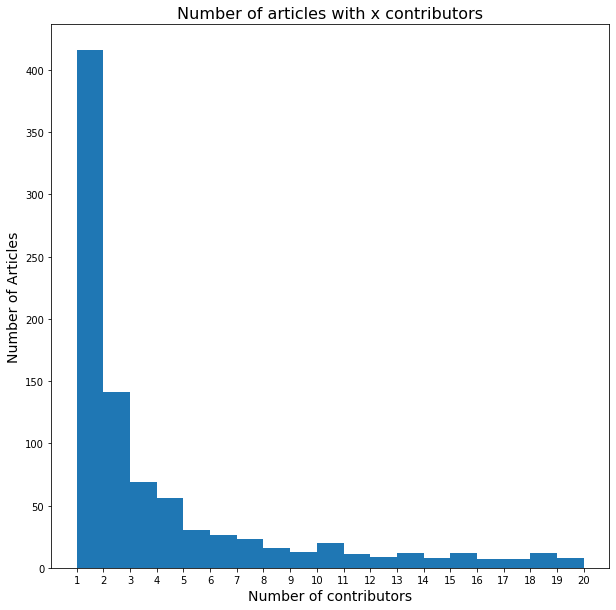

In [50]:
plt.figure(figsize=(10,10))
plt.hist(dummies.sum()[dummies.sum()<20], bins=19, range=(1,20))
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.title('Number of articles with x contributors',fontsize=16)
plt.xlabel('Number of contributors', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14);
#This interpretation is wrong! Fix!

Articles with a lot of contributors will be difficult to accurately model. Below we try to find a restriction of our data to authors who don't write together

In [51]:
final_df

,content,authors,url,title
0,"Promoting his new movie ""The Tender Bar,"" th...",[MarianneGarvey],https://www.cnn.com/2021/12/01/entertainment/b...,"<h1 class=""pg-headline"">Ben Affleck is gratefu..."
1,"Then frightened students barricaded doors, pho...","[JasonHanna, AmirVera, AdrienneBroaddus, Shimo...",https://www.cnn.com/2021/12/01/us/michigan-oxf...,NaN
2,"In a White House news briefing, Dr. Anthony Fa...","[KaitlanCollins, JacquelineHoward, BetsyKlein]",https://www.cnn.com/2021/12/01/health/us-omicr...,NaN
3,"On Tuesday, he had teased the song on Instagra...",[MarianneGarvey],https://www.cnn.com/2021/12/02/entertainment/s...,"<h1 class=""pg-headline"">Students grabbed sciss..."
4,The dispute represents the culmination of a de...,"[ArianedeVogue, SupremeCourt]",https://www.cnn.com/2021/12/01/politics/suprem...,"<h1 class=""pg-headline"">First confirmed US cas..."
...,...,...,...,...
6515,\n Marilou Danley said that she was worri...,"[MadisonPark, DarranSimon, HollyYan, EricLeven...",https://www.cnn.com/2017/10/04/us/las-vegas-sh...,NaN
6516,\n NOAA helped Key West residents check o...,[PaulPMurphy],https://www.cnn.com/2017/09/12/us/noaa-satelli...,NaN
6517,\n Hurricane Irma regained Category 5 sta...,"[JasonHanna, SteveAlmasy]",https://www.cnn.com/2017/09/08/us/hurricane-ir...,NaN
6518,"\n ,Editor’s note: This is a developing s...","[HollyYan, DarranSimon, FaithKarimi]",https://www.cnn.com/2017/09/11/us/hurricane-ir...,NaN


Here we attempt to prepare out target and nontarget values

In [52]:
X=final_df.drop(columns='authors')

In [53]:
y=final_df['authors']

In [54]:
#Code from https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies
def encoding(list_series):
    """This one hot encodes our series of lists of author names"""
    return pd.get_dummies(list_series.apply(pd.Series).stack()).sum(level=0)

In [55]:
y_encoded= encoding(y)

C:\Users\chris\AppData\Local\Temp/ipykernel_22780/4287874537.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  return pd.get_dummies(list_series.apply(pd.Series).stack()).sum(level=0)


In [56]:
y_encoded.sum(axis=1)

0       1
1       4
2       3
3       1
4       2
       ..
6515    4
6516    1
6517    2
6518    3
6519    2
Length: 6516, dtype: int64

In [57]:
y_encoded.sum(axis=0)

                                        56
:ClarissaWard                            1
AJWillingham                            27
APAlbertoPezzali                         1
AaronCooper                              5
                                        ..
exclusiveinvestigationErinMcLaughlin     1
illustrationGabrielleSmith               1
producedMatthewGannon                    2
sMatthewGannon                           1
staff                                    1
Length: 1112, dtype: int64

In [58]:
y_encoded.columns

Index(['', ':ClarissaWard', 'AJWillingham', 'APAlbertoPezzali', 'AaronCooper',
       'AaronDarveniza', 'AaronKessler', 'AaronPellish', 'AbdelrahmanKhalid',
       'AbdulBasirBina',
       ...
       'ZahraUllah', 'ZamiraRahim', 'ZaynNabbi', 'ZeenaSaifi', 'ZixuWang',
       'exclusiveinvestigationErinMcLaughlin', 'illustrationGabrielleSmith',
       'producedMatthewGannon', 'sMatthewGannon', 'staff'],
      dtype='object', length=1112)

In [59]:
def is_first_last(string):
    """This function was used to tell if an author string was a single first-last name in Camel Case"""
    count=0
    ls=[]
    for char in string:
        if(char.isupper()==True):
            count+=1
            ls.append(1)
        elif(char=='-'): #hypenated names don't count as separate names
            count-=1
        else:
            ls.append(0)
    for index in range(len(ls)-2):
        if(ls[index]==1 and ls[index+2]==1): #If consecutive characters are uppercase, then count these once. E.g. O'Brian is one name.
            count-=1
            if(ls[index+1]==1):
                count-=1
    return count
    

In [60]:
for value in y_encoded.columns:
    tf = is_first_last(value)
    if(tf>=4):
        count=0
        index=0
        for char in value[::-1]:
            index-=1
            if(char.isupper()):
                count+=1
            if(count==2):
                break
        print(value[:index],value[index:])

AditiSangal AdrienneVogt
AngelaDewan AnastasiaBeltyukova
BarbaraArvanitidis MuhammadDarwish
BryonyJonesinParisandJessica RavitzinAtlanta
ChrisBoyetteTawanda ScottSambou
ChristopherHickey TomNicholson
CristianArroyo MadeleineStix
DonieO'Sullivan SamanthaGuff
DrewKann RenéeRigdon
EdmundDFountain ZachWasser
ElijahNouvelage JonSarlin
ElizaMackintosh AlexPlatt
ElizaMackintosh HenrikPettersson
ElizaMackintosh SarahTilotta
FabienMuhire KaraFox
FrankFenimore& MattGannon
GregBotelho MatthewGannon
KaraFox DilayYalcin
KatiePolglase BarbaraArvanitidis
KatiePolglase MarkBaron
LaceyRussell WeiWang
LauraSmith-Spark AlexPlatt
LaurenSaid-Moorhouse SarahTilotta
MadeleineStix MadeleineStix
MargotHaddadwrittenLauren Said-Moorhouse
MelanieHicken SergioHernandez
MichaelMartinez MatthewGannon
NickHagen JeremyMoorhead
NimaElbagir BarbaraArvanitidis
PaulMurphy HollyYan
PaulPMurphy LukeRotzler
PaulPMurphyphotoediting SarahTilotta
RachelCraneTawanda ScottSambou
RachelWoolfEdited BradenGoyette
SarahTilotta Muhamm

In [61]:
y_encoded['ZahidMahmood'][y_encoded['ZahidMahmood']==1]

1233    1
2019    1
4143    1
Name: ZahidMahmood, dtype: uint8

In [62]:
y_encoded['ZahidMahmoodSarahTilotta'][y_encoded['ZahidMahmoodSarahTilotta']==1]

3874    1
Name: ZahidMahmoodSarahTilotta, dtype: uint8

---

## Data Preprocessing and Exploratory Data Analysis ##

In [63]:
X

,content,url,title
0,"Promoting his new movie ""The Tender Bar,"" th...",https://www.cnn.com/2021/12/01/entertainment/b...,"<h1 class=""pg-headline"">Ben Affleck is gratefu..."
1,"Then frightened students barricaded doors, pho...",https://www.cnn.com/2021/12/01/us/michigan-oxf...,NaN
2,"In a White House news briefing, Dr. Anthony Fa...",https://www.cnn.com/2021/12/01/health/us-omicr...,NaN
3,"On Tuesday, he had teased the song on Instagra...",https://www.cnn.com/2021/12/02/entertainment/s...,"<h1 class=""pg-headline"">Students grabbed sciss..."
4,The dispute represents the culmination of a de...,https://www.cnn.com/2021/12/01/politics/suprem...,"<h1 class=""pg-headline"">First confirmed US cas..."
...,...,...,...
6515,\n Marilou Danley said that she was worri...,https://www.cnn.com/2017/10/04/us/las-vegas-sh...,NaN
6516,\n NOAA helped Key West residents check o...,https://www.cnn.com/2017/09/12/us/noaa-satelli...,NaN
6517,\n Hurricane Irma regained Category 5 sta...,https://www.cnn.com/2017/09/08/us/hurricane-ir...,NaN
6518,"\n ,Editor’s note: This is a developing s...",https://www.cnn.com/2017/09/11/us/hurricane-ir...,NaN


In [64]:
y_encoded

,,:ClarissaWard,AJWillingham,APAlbertoPezzali,AaronCooper,AaronDarveniza,AaronKessler,AaronPellish,AbdelrahmanKhalid,AbdulBasirBina,...,ZahraUllah,ZamiraRahim,ZaynNabbi,ZeenaSaifi,ZixuWang,exclusiveinvestigationErinMcLaughlin,illustrationGabrielleSmith,producedMatthewGannon,sMatthewGannon,staff
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
new_index=y_encoded.sum()[y_encoded.sum()>100].index

In [66]:
rows_to_remove=y_encoded[new_index].sum(axis=1)==0

In [67]:
new_y=y_encoded[new_index].drop(index=rows_to_remove[rows_to_remove].index)

In [68]:
new_y.sum(axis=1)

75      1
109     1
116     1
117     1
127     1
       ..
6510    1
6511    1
6512    1
6514    1
6516    1
Length: 1351, dtype: int64

In [69]:
y_sorted=new_y.sum(axis=0).sort_values(ascending=False)

In [70]:
y_sorted

JenChristensen       313
ZacharyCohen         264
EliottCMcLaughlin    250
PaulPMurphy          170
JillMartin           145
KonstantinToropin    111
IvanaKottasová       108
dtype: int64

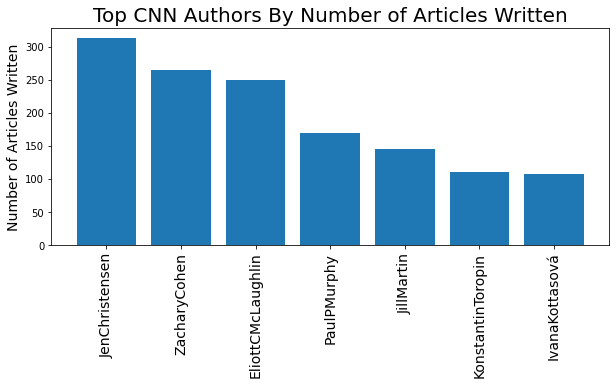

In [71]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=90, fontsize=14)
#plt.tick_params(
#    axis='x',
#    which='both',
#    bottom=False,
#    top=False,
#    labelbottom=False
#)
plt.title('Top CNN Authors By Number of Articles Written', fontsize=20)
plt.ylabel('Number of Articles Written', fontsize=14)
plt.bar(height=y_sorted, x=y_sorted.index);

In [72]:
new_y.sum(axis=1).sum()

1361

In [73]:
adjacency = new_y[new_y.sum(axis=1)!=1]

This filters down to the articles where at least two of these seven contributed.

In [74]:
adjacency

,EliottCMcLaughlin,IvanaKottasová,JenChristensen,JillMartin,KonstantinToropin,PaulPMurphy,ZacharyCohen
1056,0,0,0,0,1,1,0
1103,1,0,0,0,1,0,0
2902,0,1,0,0,0,1,0
4344,0,1,0,0,0,0,1
4350,0,1,0,0,0,0,1
4892,0,0,0,0,1,1,0
5257,0,0,1,0,0,1,0
5561,1,0,0,0,0,1,0
5862,0,0,0,0,0,1,1
6019,1,0,0,1,0,0,0


There are only 10 such articles (out of 1000+)

In [75]:
info={}
for name in adjacency.columns:
    info[name]=adjacency[adjacency[name]==1]

In [76]:
info['EliottCMcLaughlin'].index

Int64Index([1103, 5561, 6019], dtype='int64')

In [77]:
new_X=X.loc[new_y.index,]

In [78]:
new_X.index

Int64Index([  75,  109,  116,  117,  127,  129,  130,  135,  136,  137,
            ...
            6504, 6505, 6506, 6507, 6509, 6510, 6511, 6512, 6514, 6516],
           dtype='int64', length=1351)

In [79]:
def starts_with(string):
    if(string[0]=='<'):
        return True
    return False

In [80]:
new_X.content=new_X.content.str.strip()

In [81]:
needs_fixing=new_X[new_X.content.apply(starts_with)]

In [82]:
fix = needs_fixing.content.apply(BeautifulSoup).apply(get_text)

C:\Users\chris\miniconda3\lib\site-packages\pandas\core\apply.py:1099: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 1099 of the file C:\Users\chris\miniconda3\lib\site-packages\pandas\core\apply.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  mapped = lib.map_infer(


In [83]:
new_X.content[fix.index]=fix

Some of the X values still had html, we fixed that here.

In [84]:
def total_word_length(string):
    return len(string.split())

In [85]:
new_X['total_word_length']=new_X.content.apply(total_word_length)

In [86]:
def average_word_length(string):
    count=0
    for word in string.split():
        count+=len(word)
    return count/len(string.split())

In [87]:
new_X['average_word_length']=new_X.content.apply(average_word_length)

In [88]:
new_X.drop(columns='title',inplace=True)

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

In [90]:
cvec = CountVectorizer(stop_words='english')

In [91]:
vectorized_data = pd.DataFrame(cvec.fit_transform(new_X['content']).toarray(), columns=cvec.get_feature_names())

C:\Users\chris\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [92]:
new_X.index

Int64Index([  75,  109,  116,  117,  127,  129,  130,  135,  136,  137,
            ...
            6504, 6505, 6506, 6507, 6509, 6510, 6511, 6512, 6514, 6516],
           dtype='int64', length=1351)

In [93]:
new_X.columns

Index(['content', 'url', 'total_word_length', 'average_word_length'], dtype='object')

In [94]:
vectorized_data.index=new_X.index

In [95]:
vectorized_data.isna().sum().sum()

0

In [96]:
X_final=pd.concat([vectorized_data.loc[new_y.index, ],new_X.loc[new_y.index, ]], axis=1).drop(columns=['content','url'])

In [97]:
X_final.index

Int64Index([  75,  109,  116,  117,  127,  129,  130,  135,  136,  137,
            ...
            6504, 6505, 6506, 6507, 6509, 6510, 6511, 6512, 6514, 6516],
           dtype='int64', length=1351)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train,X_test,Y_train,Y_test = train_test_split(X_final,new_y, random_state=123)

In [100]:
y_train=y[Y_train.index]

In [101]:
new_y.drop(index=Y_train.sum(axis=1)[Y_train.sum(axis=1)==2].index, inplace =True)

In [103]:
X_train['Colab']=0

for ind in y_train.index:
    name_list=y_train[ind]
    for name in name_list:
        X_train['Colab'][ind]=len(y_train[ind])
        if(name in y_sorted.index):
            y_train[ind]=name



y_test=y[Y_test.index]

X_test['Colab']=0

for ind in y_test.index:
    name_list=y_test[ind]
    for name in name_list:
        X_test['Colab'][ind]=len(y_test[ind])
        if(name in y_sorted.index):
            y_test[ind]=name

X_train.Colab.sort_values()

C:\Users\chris\AppData\Local\Temp/ipykernel_22780/3449029493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Colab'][ind]=len(y_train[ind])
C:\Users\chris\AppData\Local\Temp/ipykernel_22780/3449029493.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Colab'][ind]=len(y_test[ind])


5775     1
6447     1
5776     1
5119     1
5940     1
        ..
6013    17
1105    17
5961    17
1119    17
1130    17
Name: Colab, Length: 1013, dtype: int64

In [104]:
len(X_train.Colab[X_train.Colab>1])/len(X_train.Colab)

0.3830207305034551

In [105]:
len(X_test.Colab[X_test.Colab>1])/len(X_test.Colab)

0.42011834319526625

In [106]:
new_y.index

Int64Index([  75,  109,  116,  117,  127,  129,  130,  135,  136,  137,
            ...
            6504, 6505, 6506, 6507, 6509, 6510, 6511, 6512, 6514, 6516],
           dtype='int64', length=1344)

In [107]:
y_sorted.index

Index(['JenChristensen', 'ZacharyCohen', 'EliottCMcLaughlin', 'PaulPMurphy',
       'JillMartin', 'KonstantinToropin', 'IvanaKottasová'],
      dtype='object')

In [108]:
y_encoded.sum(axis=1)

0       1
1       4
2       3
3       1
4       2
       ..
6515    4
6516    1
6517    2
6518    3
6519    2
Length: 6516, dtype: int64

In [109]:
Y_train.columns

Index(['EliottCMcLaughlin', 'IvanaKottasová', 'JenChristensen', 'JillMartin',
       'KonstantinToropin', 'PaulPMurphy', 'ZacharyCohen'],
      dtype='object')

In [110]:
Y_train.drop(index=Y_train.sum(axis=1)[Y_train.sum(axis=1)==2].index)

,EliottCMcLaughlin,IvanaKottasová,JenChristensen,JillMartin,KonstantinToropin,PaulPMurphy,ZacharyCohen
5775,0,0,0,0,0,1,0
5180,0,0,1,0,0,0,0
5346,0,0,1,0,0,0,0
6516,0,0,0,0,0,1,0
6000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
6296,0,0,0,0,0,0,1
1216,0,1,0,0,0,0,0
5975,1,0,0,0,0,0,0
6062,1,0,0,0,0,0,0


There are 1006 articles where exactly one of our seven high profile writers was an author.

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
logreg = LogisticRegression()

In [113]:
list(y_sorted.index)

['JenChristensen',
 'ZacharyCohen',
 'EliottCMcLaughlin',
 'PaulPMurphy',
 'JillMartin',
 'KonstantinToropin',
 'IvanaKottasová']

In [114]:
y_train[1100]

'KonstantinToropin'

In [115]:
logreg.fit(X_train.drop(columns='Colab'),y_train)
logreg.score(X_test.drop(columns='Colab'),y_test)

C:\Users\chris\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8431952662721893

In [116]:
y_test.mode()

0    JenChristensen
dtype: object

In [117]:
(y_test=='JenChristensen').sum()/len(y_test)

0.21005917159763313

In [118]:
y_test.value_counts(normalize=True)

JenChristensen       0.210059
ZacharyCohen         0.207101
EliottCMcLaughlin    0.207101
JillMartin           0.115385
PaulPMurphy          0.103550
KonstantinToropin    0.088757
IvanaKottasová       0.068047
Name: authors, dtype: float64

In [119]:
y_train[y_train.values=='JenChristensen']

5180    JenChristensen
5346    JenChristensen
5272    JenChristensen
5190    JenChristensen
5318    JenChristensen
             ...      
5358    JenChristensen
5089    JenChristensen
5102    JenChristensen
5342    JenChristensen
5134    JenChristensen
Name: authors, Length: 241, dtype: object

In [120]:
#X_train['Colab'][y_train[y_train.values=='IvanKottaso'].index]

In [121]:
y_train.values

array(['PaulPMurphy', 'JenChristensen', 'JenChristensen', ...,
       'EliottCMcLaughlin', 'EliottCMcLaughlin', 'IvanaKottasová'],
      dtype=object)

In [122]:
X_train['Colab'][y_train[y_train.values=='JenChristensen'].index]

5180     1
5346     1
5272     1
5190     3
5318     1
        ..
5358    14
5089     1
5102     1
5342     1
5134     1
Name: Colab, Length: 241, dtype: int64

In [123]:
X_train['Colab'][y_train[y_train.values=='JenChristensen'].index].sort_values().unique()

array([ 1,  2,  3, 14], dtype=int64)

In [124]:
X_train['Colab'][y_train[y_train.values=='JenChristensen'].index].sort_values().value_counts().sort_index()

1     205
2      10
3       2
14     24
Name: Colab, dtype: int64

<BarContainer object of 4 artists>

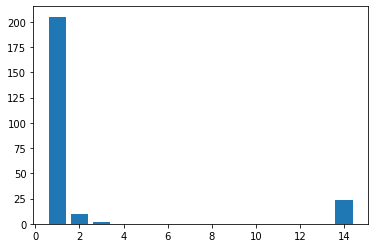

In [125]:
plt.bar(x=X_train['Colab'][y_train[y_train.values=='JenChristensen'].index].sort_values().unique(), 
        height=X_train['Colab'][y_train[y_train.values=='JenChristensen'].index].sort_values().value_counts().sort_index().values)

In [130]:
logreg.coef_[0],

(array([ 0.0037618 ,  0.04276584, -0.00048353, ..., -0.0031146 ,
         0.0080432 , -0.41255023]),)

## Model Evaluation and Next Steps

In [131]:
from sklearn.metrics import ConfusionMatrixDisplay, plot_confusion_matrix

C:\Users\chris\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


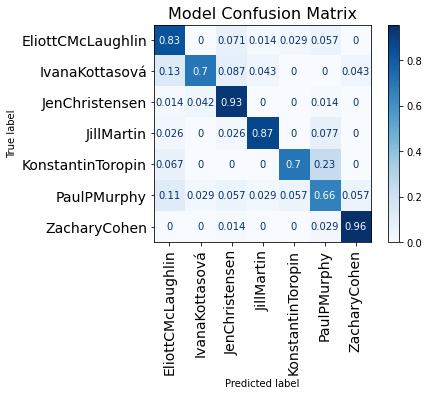

In [132]:
plot_confusion_matrix(logreg,X_test.drop(columns='Colab'), y_test, cmap='Blues', normalize='true')
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.title('Model Confusion Matrix',fontsize=16);

Doing some outside research, we found that these authors had the following job titles.

| Author | Title | Accuracy | Articles Scraped |
| --- | --- | --- | ---|
|Jen ChristenSen | Health & Climate Unit| 93% | 312 |
|Zachary Cohen | National Security Reporter| 96% | 263 |
|Eliott C. McLaughlin | Senior Writer| 83% | 248 |
|Jill Martin | Sports News Editor| 87% | 145 |
|Konstantin Toropin | News Editor| 70% | 111 |
|Ivana Kottasova | Digital News Producer| 70% | 105 |
|Paul P. Murphy | Producer / Writer| 66% | 167 |

In [141]:
(y_train.value_counts().sort_values(ascending=False)+y_test.value_counts().sort_values(ascending=False)).sort_values(ascending=False)

JenChristensen       312
ZacharyCohen         263
EliottCMcLaughlin    248
PaulPMurphy          167
JillMartin           145
KonstantinToropin    111
IvanaKottasová       105
Name: authors, dtype: int64

This goes a long way to explaining the accuracy of our model. A National Security Reporter is unlikely to cover the same topics as a Sports News Editor